### Read the data

In [11]:
import pandas as pd
import numpy as np
myDF = pd.read_csv('Telco-Customer-Churn.csv')

In [12]:
# Show the data
myDF.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [13]:
# Check the number of rows
len(myDF)

7043

### Clean and transform data as and when required

In [14]:
myDF = myDF.drop(['customerID','gender'],axis=1)
myDF.head()

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [15]:
# If needed, get rid of rows with null / missing values - not necessary
myDF = myDF[pd.notnull(myDF)]
len(myDF)

7043

In [16]:
X = myDF.iloc[:, :-1].values
y = myDF.iloc[:, 18].values

In [17]:
# Encoding the Dependent Variable
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder_y = LabelEncoder()
myDF['Churn'] = labelencoder_y.fit_transform(myDF['Churn'])

In [18]:
# Encoding the Independent Variable
labelencoder_X = LabelEncoder()
myDF["Partner"] = labelencoder_X.fit_transform(myDF['Partner'])
labelencoder_X = LabelEncoder()
myDF["Dependents"] = labelencoder_X.fit_transform(myDF['Dependents'])
labelencoder_X = LabelEncoder()
myDF["PhoneService"] = labelencoder_X.fit_transform(myDF['PhoneService'])
labelencoder_X = LabelEncoder()
myDF["MultipleLines"] = labelencoder_X.fit_transform(myDF['MultipleLines'])
labelencoder_X = LabelEncoder()
myDF["InternetService"] = labelencoder_X.fit_transform(myDF['InternetService'])
labelencoder_X = LabelEncoder()
myDF["OnlineSecurity"] = labelencoder_X.fit_transform(myDF['OnlineSecurity'])
labelencoder_X = LabelEncoder()
myDF["OnlineBackup"] = labelencoder_X.fit_transform(myDF['OnlineBackup'])
labelencoder_X = LabelEncoder()
myDF["DeviceProtection"] = labelencoder_X.fit_transform(myDF['DeviceProtection'])
labelencoder_X = LabelEncoder()
myDF["TechSupport"] = labelencoder_X.fit_transform(myDF['TechSupport'])
labelencoder_X = LabelEncoder()
myDF["StreamingTV"] = labelencoder_X.fit_transform(myDF['StreamingTV'])
labelencoder_X = LabelEncoder()
myDF["StreamingMovies"] = labelencoder_X.fit_transform(myDF['StreamingMovies'])
labelencoder_X = LabelEncoder()
myDF["PaperlessBilling"] = labelencoder_X.fit_transform(myDF['PaperlessBilling'])
labelencoder_X = LabelEncoder()
myDF["PaymentMethod"] = labelencoder_X.fit_transform(myDF['PaymentMethod'])

In [19]:
myDF.head()

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,1,0,1,0,1,0,0,2,0,0,0,0,Month-to-month,1,2,29.85,29.85,0
1,0,0,0,34,1,0,0,2,0,2,0,0,0,One year,0,3,56.95,1889.5,0
2,0,0,0,2,1,0,0,2,2,0,0,0,0,Month-to-month,1,3,53.85,108.15,1
3,0,0,0,45,0,1,0,2,0,2,2,0,0,One year,0,0,42.30,1840.75,0
4,0,0,0,2,1,0,1,0,0,0,0,0,0,Month-to-month,1,2,70.70,151.65,1


### Conduct exploratory analysis

In [20]:
print(myDF.describe())

       SeniorCitizen      Partner   Dependents       tenure  PhoneService  \
count    7043.000000  7043.000000  7043.000000  7043.000000   7043.000000   
mean        0.162147     0.483033     0.299588    32.371149      0.903166   
std         0.368612     0.499748     0.458110    24.559481      0.295752   
min         0.000000     0.000000     0.000000     0.000000      0.000000   
25%         0.000000     0.000000     0.000000     9.000000      1.000000   
50%         0.000000     0.000000     0.000000    29.000000      1.000000   
75%         0.000000     1.000000     1.000000    55.000000      1.000000   
max         1.000000     1.000000     1.000000    72.000000      1.000000   

       MultipleLines  InternetService  OnlineSecurity  OnlineBackup  \
count    7043.000000      7043.000000     7043.000000   7043.000000   
mean        0.940508         0.872923        0.790004      0.906432   
std         0.948554         0.737796        0.859848      0.880162   
min         0.000000  

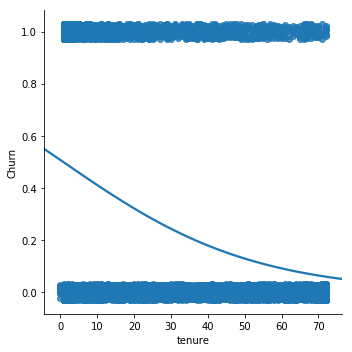

In [21]:
import seaborn as sns
sns.lmplot(x="tenure", y="Churn", data=myDF,
           logistic=True, y_jitter=.03, ci=None);

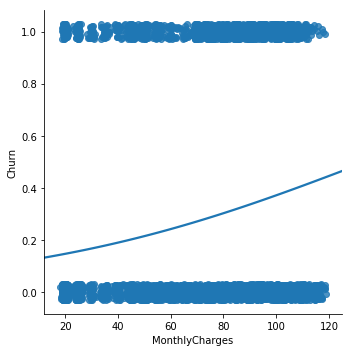

In [22]:
import seaborn as sns
sns.lmplot(x="MonthlyCharges", y="Churn", data=myDF,
           logistic=True, y_jitter=.03, ci=None);

### Choose and deploy the prediction model

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [24]:
from patsy import dmatrices
from sklearn.linear_model import LogisticRegression
import numpy as np

In [25]:
# Create matrices
y, X = dmatrices('Churn ~ SeniorCitizen + Partner + Dependents + tenure + \
                       PhoneService + MultipleLines + InternetService + OnlineSecurity + \
                       OnlineBackup + DeviceProtection + TechSupport + StreamingTV + StreamingMovies + \
                       Contract + PaperlessBilling + PaymentMethod + MonthlyCharges + TotalCharges', 
                       myDF,return_type= 'dataframe')

#make y a compressed matrix
y= np.ravel(y) 

In [26]:
print(X)

      Intercept  Contract[T.One year]  Contract[T.Two year]  \
0           1.0                   0.0                   0.0   
1           1.0                   1.0                   0.0   
2           1.0                   0.0                   0.0   
3           1.0                   1.0                   0.0   
4           1.0                   0.0                   0.0   
5           1.0                   0.0                   0.0   
6           1.0                   0.0                   0.0   
7           1.0                   0.0                   0.0   
8           1.0                   0.0                   0.0   
9           1.0                   1.0                   0.0   
10          1.0                   0.0                   0.0   
11          1.0                   0.0                   1.0   
12          1.0                   1.0                   0.0   
13          1.0                   0.0                   0.0   
14          1.0                   0.0                  

In [69]:
# sklearn output
model = LogisticRegression()
mdl = model.fit(X,y)
model.score(X,y)    

0.8778929433480052

In [28]:
y.mean()

0.2653698707936959

In [29]:
import numpy as np
np.random.seed(0)

In [30]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
print(len(X_train))
print(len(X_test))

4930
2113


### Calculate the model performance metrics

In [31]:
model2 = LogisticRegression()
model2.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [32]:
predicted = model2.predict(X_test)
print (predicted)

[0. 0. 0. ... 0. 0. 0.]


In [33]:
myList = []
for i in range(len(predicted)):
    myList.append((int(y_test[i]),int(predicted[i])))
print(myList)

[(0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (1, 1), (0, 0), (1, 1), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (1, 0), (0, 0), (0, 0), (0, 0), (0, 1), (0, 0), (1, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (1, 0), (1, 1), (0, 0), (0, 0), (1, 0), (0, 0), (0, 1), (0, 0), (1, 1), (1, 1), (1, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (1, 1), (0, 0), (0, 0), (0, 0), (0, 0), (1, 0), (0, 0), (1, 1), (1, 1), (0, 0), (1, 0), (0, 0), (1, 1), (0, 0), (1, 0), (0, 0), (0, 0), (0, 0), (1, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (1, 0), (0, 0), (0, 0), (0, 1), (0, 0), (0, 0), (0, 0), (0, 1), (0, 0), (0, 0), (0, 0), (1, 0), (0, 0), (0, 0), (0, 0), (1, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (1, 0), (1, 1), (0, 1), (0, 0), (0, 0), (0, 0), (0, 0), (1, 1), (0, 0), (0, 0), (0, 0), (0, 1), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (1, 1), (0, 0), (0, 0), (0, 0), (0, 0), (0, 1), (0, 1), (0, 0), (0, 0),

In [34]:
# generate class probabilities
probs = model2.predict_proba(X_test)
print (len(probs))

2113


In [35]:
# generate evaluation metrics
from sklearn import metrics
print (metrics.accuracy_score(y_test, predicted))
print (metrics.roc_auc_score(y_test, probs[:, 1]))

0.7974443918599148
0.8324164232392081


In [36]:
print (metrics.confusion_matrix(y_test, predicted))
print("-----------------")
print (metrics.classification_report(y_test, predicted))

[[1387  173]
 [ 255  298]]
-----------------
             precision    recall  f1-score   support

        0.0       0.84      0.89      0.87      1560
        1.0       0.63      0.54      0.58       553

avg / total       0.79      0.80      0.79      2113



### Perform 10-fold cross validation

In [37]:
# evaluate the model using 10-fold cross-validation
from sklearn.model_selection import cross_val_score
scores = cross_val_score(LogisticRegression(), X, y, scoring='accuracy', cv=10)
print (scores)
print (scores.mean())
# avoid sampling error

[0.80141844 0.8070922  0.80567376 0.83120567 0.79119318 0.78267045
 0.80823864 0.796875   0.80113636 0.80938834]
0.8034892042989746
